In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from IPython.display import Image
from preprocess import data_pipe
import tensorflow as tf

In [2]:
df = pd.read_csv(os.path.join('data', 'stocks_1980_2020.csv'))
df.set_index('Date', inplace=True)

In [3]:
df.head()

,AAPL,ABBV,ABT,AMGN,AMZN,AVGO,BRK-B,BA,BAC,BMY,...,PFE,PG,PM,T,UNH,V,VZ,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.849159,0.129047,0.096055,...,0.000661,0.033995,NaN,NaN,NaN,NaN,NaN,0.003375,0.049441,0.607339
1980-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.872450,0.127853,0.095065,...,0.000661,0.033537,NaN,NaN,NaN,NaN,NaN,0.003326,0.048887,0.591838
1980-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.054105,0.127853,0.095395,...,0.000685,0.033709,NaN,NaN,NaN,NaN,NaN,0.003358,0.049994,0.597475
1980-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.128629,0.129047,0.095725,...,0.000685,0.033537,NaN,NaN,NaN,NaN,NaN,0.003358,0.049810,0.594657
1980-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.161235,0.127853,0.099026,...,0.000718,0.033652,NaN,NaN,NaN,NaN,NaN,0.003375,0.050732,0.598884


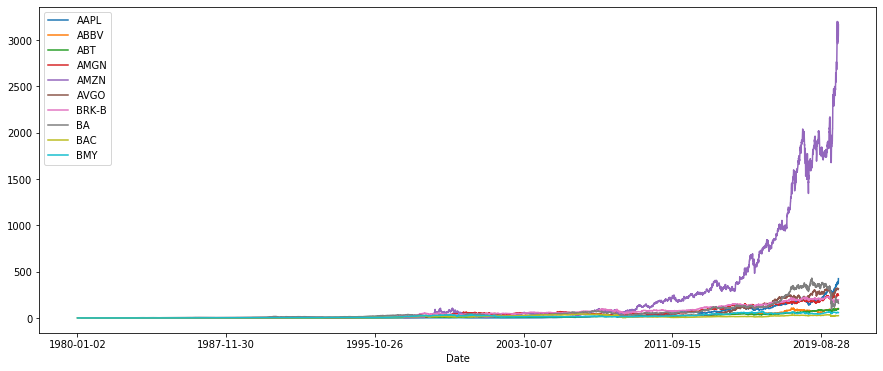

In [4]:
df.iloc[:, :10].plot(figsize=(15, 6));

# Recurent Neural Networks (RNN)
Recurrent Neural Networks take the time dimension into accout by introducing a recursive connection with a time delay of -1. Keras implements RNN with the class called SimpleRNN.

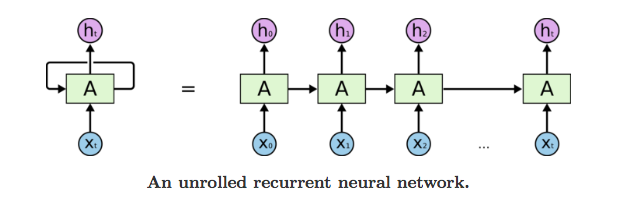

In [5]:
Image(filename="rnn.png")

### Preprocess data

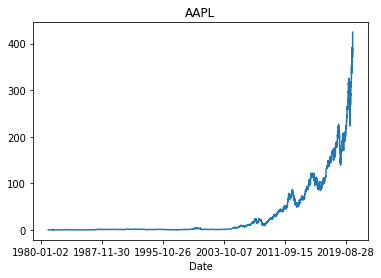

AAPL
(10234,)
##################################################


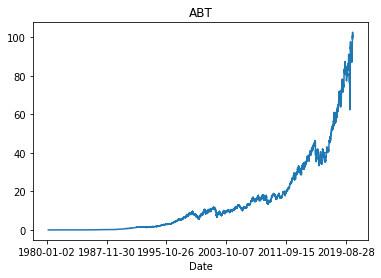

ABT
(10234,)
##################################################


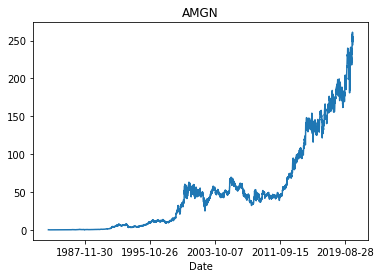

AMGN
(10234,)
##################################################


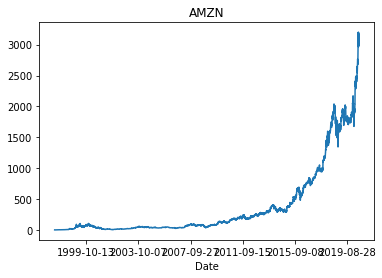

AMZN
(10234,)
##################################################


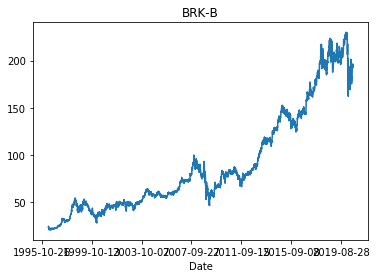

BRK-B
(10234,)
##################################################


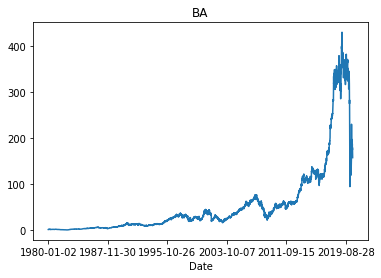

BA
(10234,)
##################################################


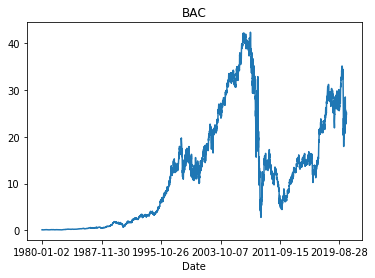

BAC
(10234,)
##################################################


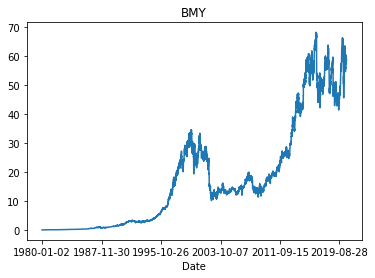

BMY
(10234,)
##################################################


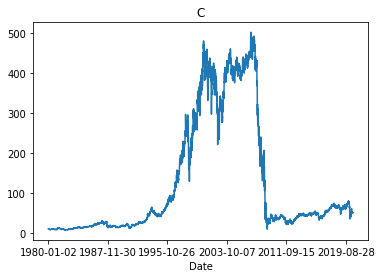

C
(10234,)
##################################################


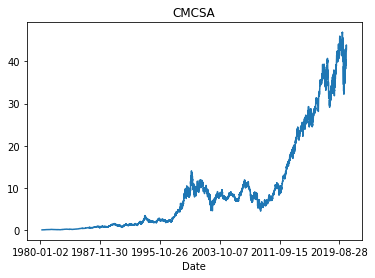

CMCSA
(10234,)
##################################################


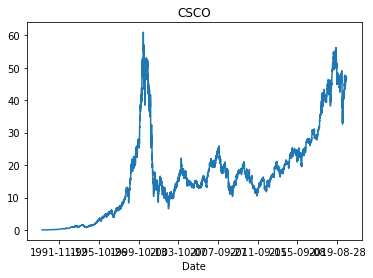

CSCO
(10234,)
##################################################


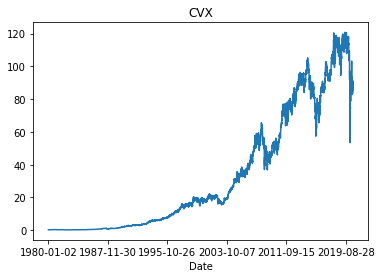

CVX
(10234,)
##################################################


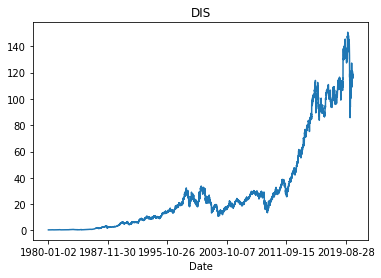

DIS
(10234,)
##################################################


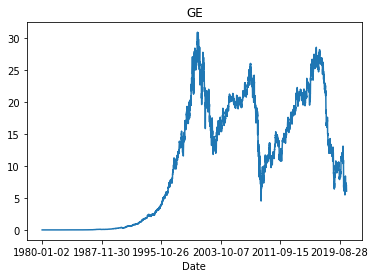

GE
(10234,)
##################################################


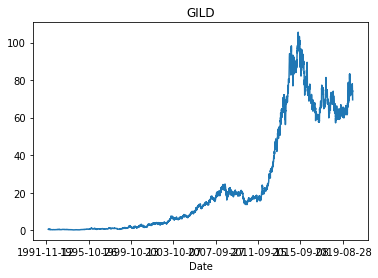

GILD
(10234,)
##################################################


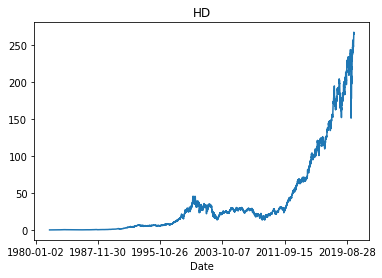

HD
(10234,)
##################################################


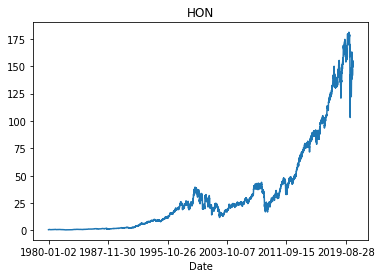

HON
(10234,)
##################################################


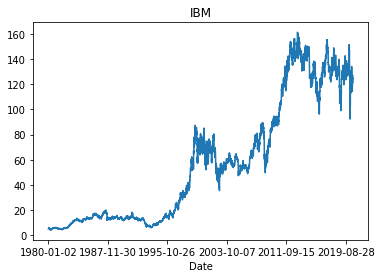

IBM
(10234,)
##################################################


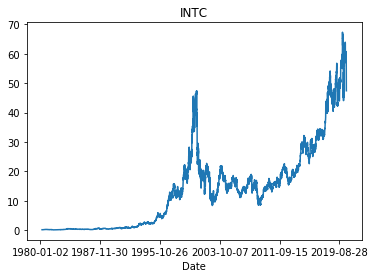

INTC
(10234,)
##################################################


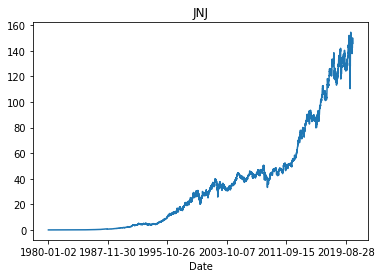

JNJ
(10234,)
##################################################


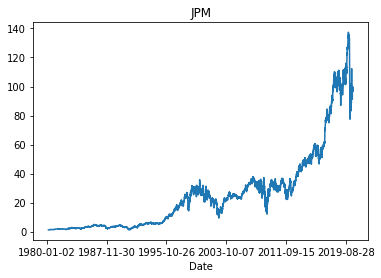

JPM
(10234,)
##################################################


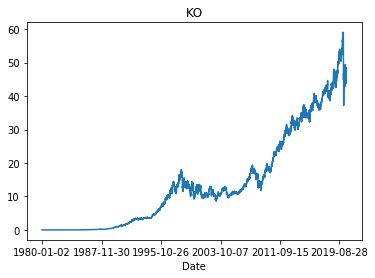

KO
(10234,)
##################################################


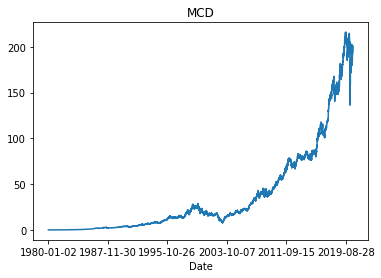

MCD
(10234,)
##################################################


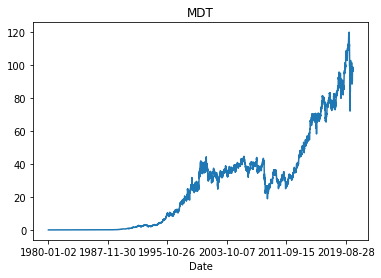

MDT
(10234,)
##################################################


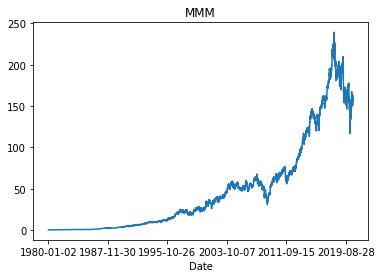

MMM
(10234,)
##################################################


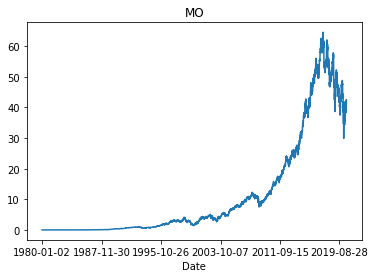

MO
(10234,)
##################################################


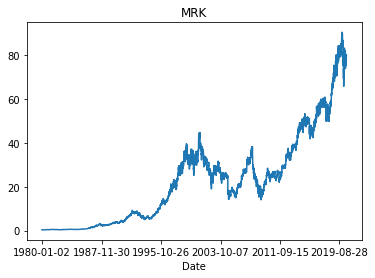

MRK
(10234,)
##################################################


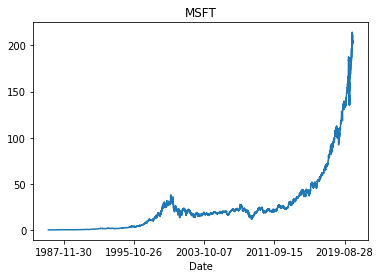

MSFT
(10234,)
##################################################


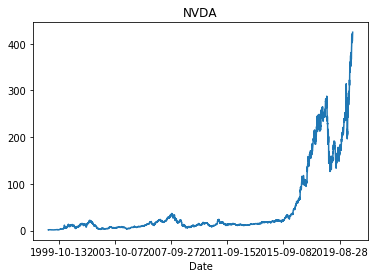

NVDA
(10234,)
##################################################


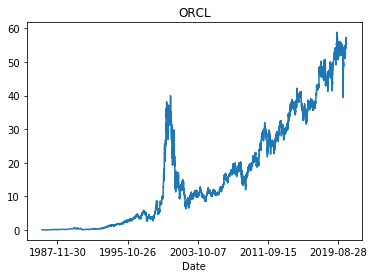

ORCL
(10234,)
##################################################


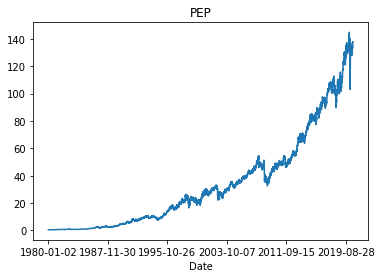

PEP
(10234,)
##################################################


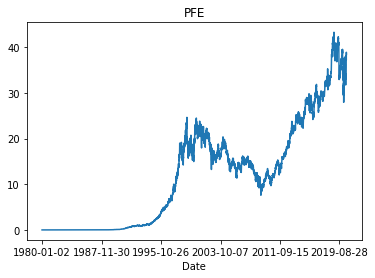

PFE
(10234,)
##################################################


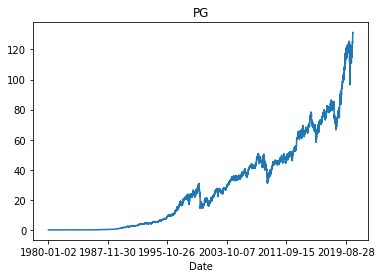

PG
(10234,)
##################################################


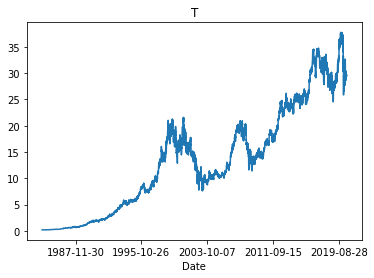

T
(10234,)
##################################################


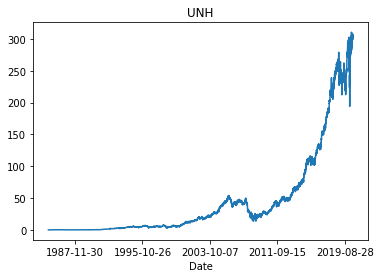

UNH
(10234,)
##################################################


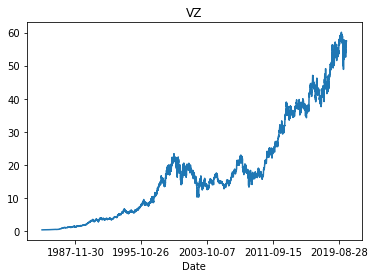

VZ
(10234,)
##################################################


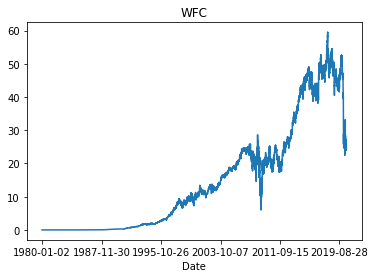

WFC
(10234,)
##################################################


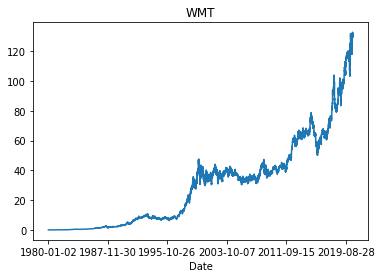

WMT
(10234,)
##################################################


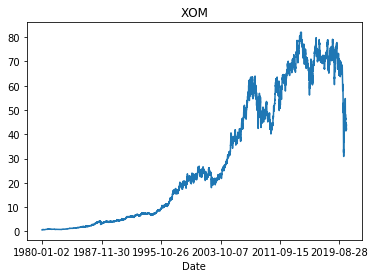

XOM
(10234,)
##################################################


In [6]:
metrics_df = pd.DataFrame()

optim_param_dict = {}

for c in df.columns:
    optim_param = pd.DataFrame()
    if df.loc[:, c].isnull().sum()/len(df) < 0.5:
        df.loc[:, c].plot(title=f'{c}');
        plt.show();
        print(c)
        print(df[c].shape)
        first_valid = df.loc[:, c].first_valid_index()
        data_dict = data_pipe(df.loc[first_valid:, c].values.reshape(-1, 1), 
                              use_tf_data=False, use_transformer=True)
        
        xtrain, ytrain, xval, yval, xtest, ytest = (data_dict['xtrain'],
                                                    data_dict['ytrain'], 
                                                    data_dict['xval'],  
                                                    data_dict['yval'],  
                                                    data_dict['xtest'],
                                                    data_dict['ytest'])
        num_outputs = ytrain.shape[-1]
        hyper_lstm = None

        print('#' * 50)
        
# except Exception as e:
#     print('An exception ocurred:', e)

